In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [7]:
facebook_ads_data = pd.read_csv(r'C:\Users\mirni\OneDrive\Рабочий стол\facebook_ads_data (2.0).csv')

# убрал строки в которых вообще никаких значений 
facebook_ads_data = facebook_ads_data.dropna(how='all', subset=['cpc', 'cpm', 'ctr', 'romi'])

facebook_ads_data.sample(3)

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
984,2021-07-17,Lookalike,288.03,99642,1055,314.66,0.27,2.89,0.010588,1.092456
1293,2021-05-17,Electronics,15.46,3529,30,20.89,0.52,4.38,0.008501,1.351229
1257,2021-05-27,Electronics,6.43,9326,57,6.17,0.11,0.69,0.006112,0.959565


## 1. Зроби групування даних по дням та для згрупованих даних побудуй два графіки:

In [8]:
# Отфильтрованые данные за 2021 год
ad_date_2021 = facebook_ads_data[(facebook_ads_data['ad_date'] < '2022-01-01') & (facebook_ads_data['ad_date'] > '2020-12-31')]
ad_date_2021.sample(3)

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
811,2021-08-15,Promos,57.98,3668,107,104.96,0.54,15.81,0.029171,1.810279
798,2021-08-17,Wholesale,97.82,12024,249,120.55,0.39,8.14,0.020709,1.232366
1319,2021-05-08,Electronics,176.84,63243,356,239.43,0.50,2.80,0.005629,1.353936


#### Графік з щоденною сумою витрат на рекламу в 2021 році;

In [9]:
daily_spend2021 = ad_date_2021.groupby('ad_date',as_index=False)['total_spend'].agg('sum')

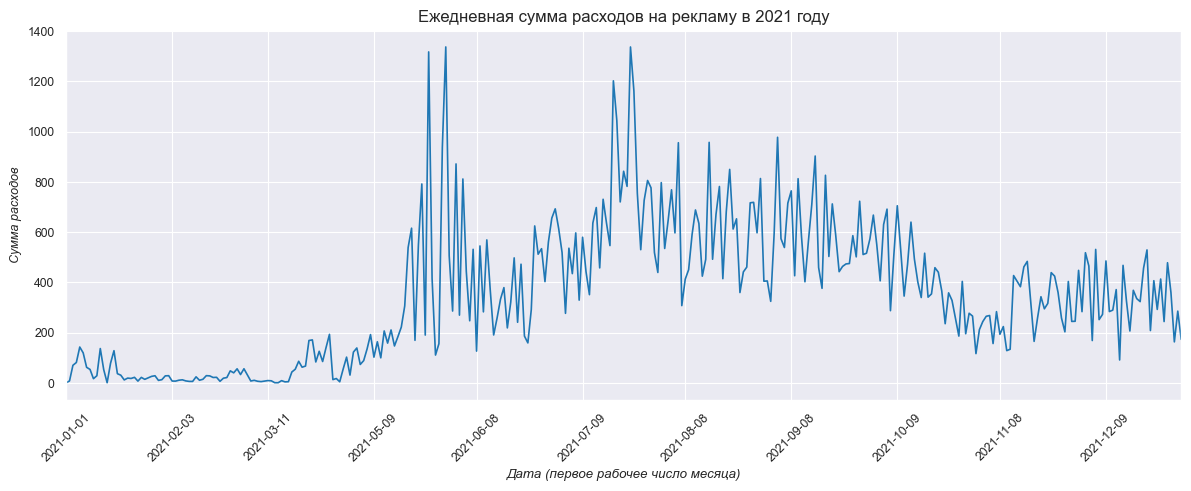

In [10]:
sns.set_context("paper", font_scale=1)
sns.set_style("darkgrid")

plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_spend2021, x='ad_date', y='total_spend')

# Форматирование оси X для отображения месяцев
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Отображать метки по месяцам

plt.xticks(rotation=45)

plt.title('Ежедневная сумма расходов на рекламу в 2021 году', fontsize=12)
plt.xlabel('Дата (первое рабочее число месяца)', fontstyle='italic')
plt.ylabel('Сумма расходов', fontstyle='italic', fontsize=9)

# Ось X от начала до конца данных
plt.xlim(daily_spend2021['ad_date'].iloc[0], daily_spend2021['ad_date'].iloc[-1])

plt.tight_layout()
plt.show()


#### Графік з щоденним ROMI в 2021 році.

In [11]:
daily_avg_romi2021 = ad_date_2021.groupby('ad_date', as_index=False)['romi'].agg('sum')

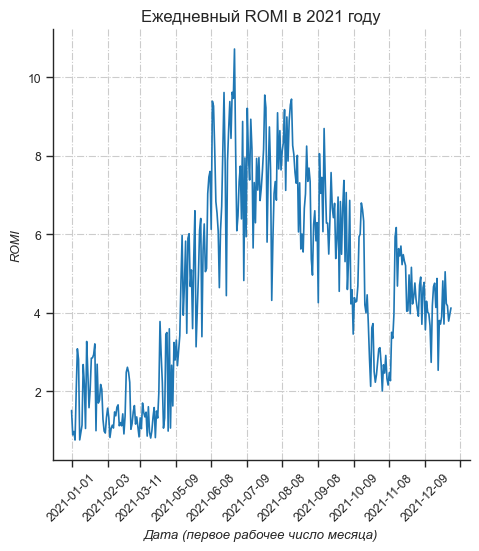

In [12]:
sns.set_context("paper", font_scale=1)
sns.set_style("ticks")

sns.relplot(ad_date_2021, x=daily_avg_romi2021['ad_date'], y=daily_avg_romi2021["romi"], kind='line')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

plt.title('Ежедневный ROMI в 2021 году',fontsize=12)
plt.xlabel('Дата (первое рабочее число месяца)',fontstyle='italic')
plt.ylabel('ROMI',fontstyle='italic', fontsize=9)
plt.grid(True,linestyle='-.')
plt.show()

#### Бонусне завдання: застосуй метод rolling() щоб відобразити рухоме середнє витрат та ROMI

In [16]:
daily_avg_romi2021['romi'].rolling(window=10).mean().dropna()

9      1.491563
10     1.608681
11     1.738368
12     1.746193
13     1.997428
         ...   
322    4.079778
323    4.083733
324    3.974950
325    4.117336
326    4.149314
Name: romi, Length: 318, dtype: float64

## 2. Зроби групування даних за назвою кампанії побудуй два графіки:

#### Графік загальної суми витрат на рекламу в кожній з кампаній;

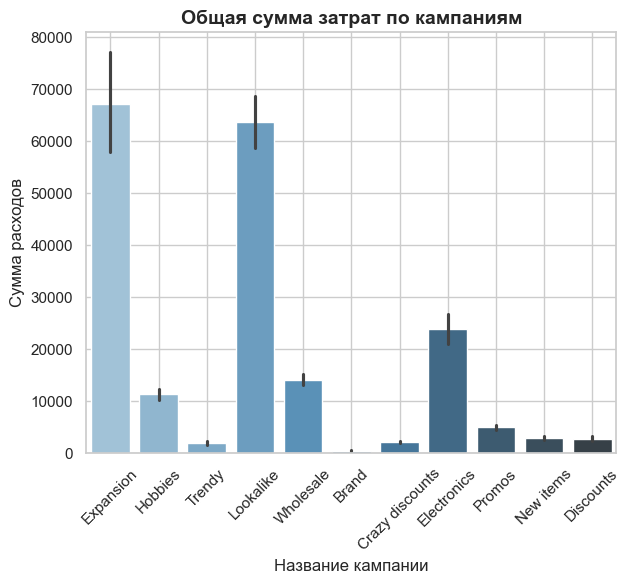

In [17]:
total_spend = facebook_ads_data.groupby('campaign_name',as_index=False)['total_spend'].agg('sum')

sns.set(style='whitegrid', palette='pastel')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=facebook_ads_data, x='campaign_name', y='total_spend', estimator=sum, palette='Blues_d',hue='campaign_name')
plt.title('Общая сумма затрат по кампаниям', fontsize=14, fontweight='bold')
plt.xlabel('Название кампании', fontsize=12)
plt.ylabel('Сумма расходов', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

#### Загальний ROMI в кожній з кампаній.

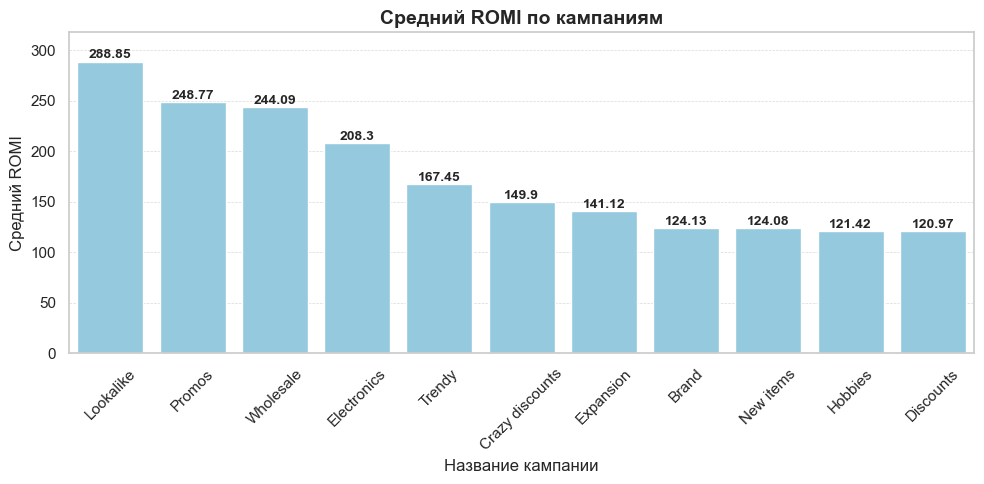

In [60]:
total_romi = facebook_ads_data.groupby('campaign_name', as_index=False)['romi'].sum().sort_values(by='romi', ascending=False)
total_romi['romi'] = total_romi['romi'].round(3)

plt.figure(figsize=(10, 5))

ax = sns.barplot(x='campaign_name', y='romi', data=total_romi, color="skyblue")

plt.title('Средний ROMI по кампаниям', fontsize=14, fontweight='bold')
plt.xlabel('Название кампании', fontsize=12)
plt.ylabel('Средний ROMI', fontsize=12)
plt.xticks(rotation=45)

plt.grid(True, which='both', axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.3)

plt.ylim(0, total_romi['romi'].max() * 1.1)  # верхнее пространство +10%

# метки над столбцами
for index, value in enumerate(total_romi['romi']):
    plt.text(index, 
             value + 0.1,  # Чуть выше столбца
             str(round(value, 2)), 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

## 3. За допомогою box plot визнач, яким був розкид щоденного ROMI в кожній кампаній (за назвою кампанії.)

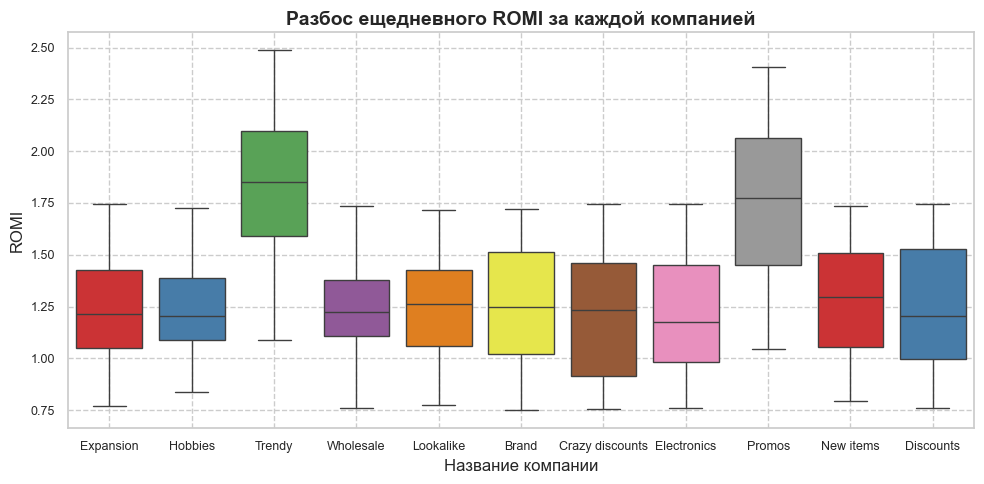

In [249]:
# box plot
plt.figure(figsize=(10, 5))
sns.boxplot(data=facebook_ads_data, x='campaign_name', y='romi', palette='Set1',hue='campaign_name')
plt.title('Разбос ещедневного ROMI за каждой компанией', fontsize=14, fontweight='bold')
plt.xlabel('Название компании', fontsize=12)
plt.ylabel('ROMI', fontsize=12)
plt.grid(True,linestyle='--')

plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.tight_layout()
plt.show()

## 4. Побудуй гістограму з розподілом значень ROMI в таблиці facebook_ads_data.csv

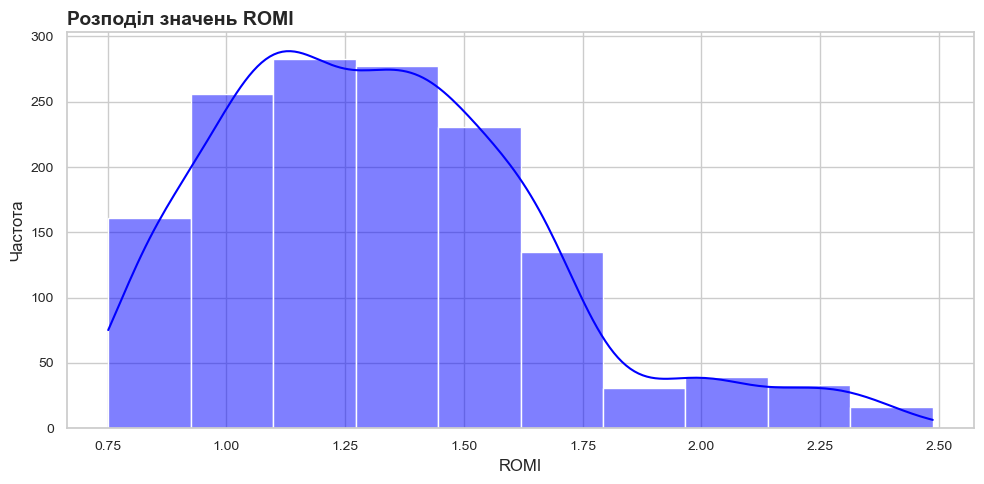

In [258]:
plt.figure(figsize=(10, 5))
sns.histplot(facebook_ads_data['romi'], bins=10, kde=True, color='blue')
plt.title('Розподіл значень ROMI', fontsize=14, fontweight='bold',loc='left')
plt.xlabel('ROMI', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(True)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

## 5. Побудуй теплову карту кореляції між усіма числовими показниками в таблиці facebook_ads_data.csv. Які показники мають найвищу та найнижчу кореляцію? З чим корелює "total_value"?

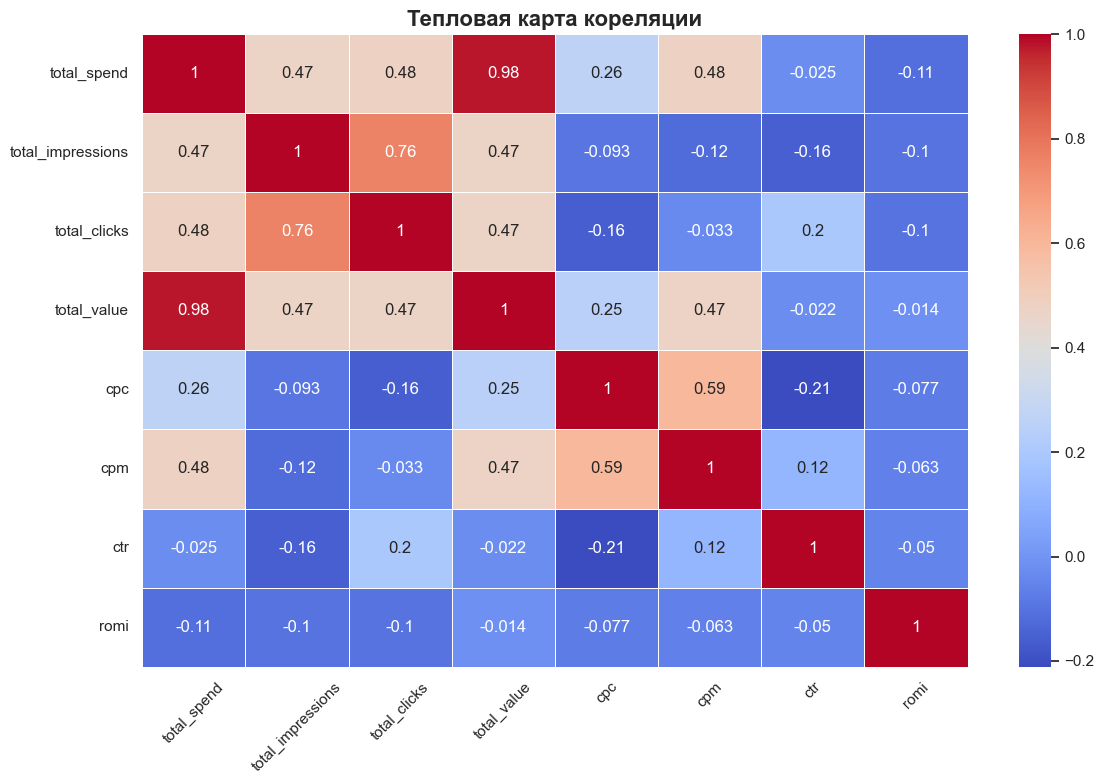

Які показники мають найвищу та найнижчу кореляцію?
Ответ: total_value, total_spend, total_impressions, total_clicks
З чим корелює "total_value"?
Ответ: total_spend, cpm,total, total_impressions, total_clicks


In [61]:
correlation_matrix = facebook_ads_data.iloc[:,2:].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.6)
plt.title('Тепловая карта кореляции', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f'Які показники мають найвищу та найнижчу кореляцію?\nОтвет: total_value, total_spend, total_impressions, total_clicks')
print(f'З чим корелює "total_value"?\nОтвет: total_spend, cpm,total, total_impressions, total_clicks')

## 6. Побудовано точкову діаграму з лінійною регресією, використовуючи функцію lmplot(), на основі даних з "total_spend" та "total_value" для візуалізації зв'язку між цими величинами.

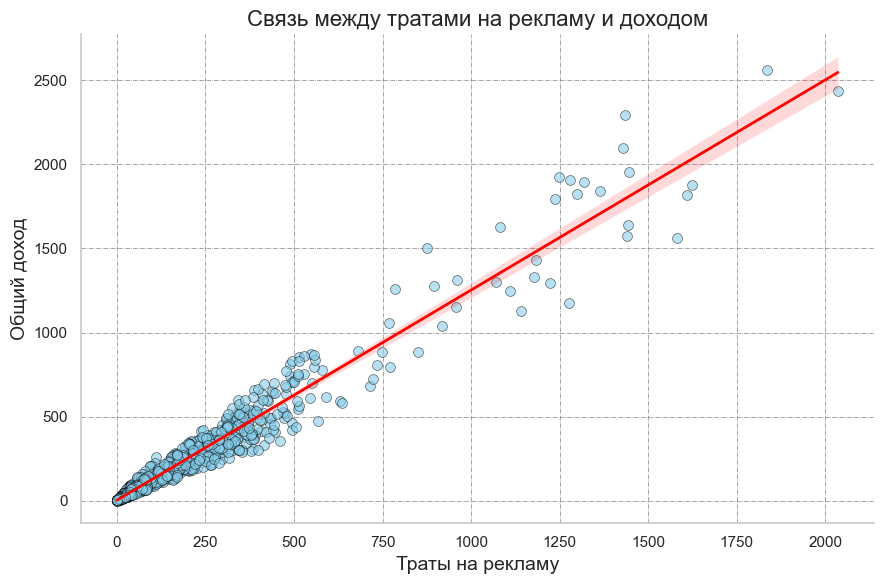

In [79]:
sns.set(style='whitegrid')

sns.lmplot(x='total_spend', y='total_value', data=facebook_ads_data,
           line_kws={'color': 'red', 'linewidth': 2},
           scatter_kws={'color': 'skyblue', 'alpha': 0.6, 's': 50, 
                        'edgecolor': 'black', 'linewidths': 0.5})  #контур вокруг кругов

plt.title("Связь между тратами на рекламу и доходом", fontsize=16)
plt.xlabel("Траты на рекламу", fontsize=14)
plt.ylabel("Общий доход", fontsize=14)

plt.grid(color='gray', linestyle='-.', linewidth=0.5)

plt.gcf().set_size_inches(9, 6)

plt.tight_layout()
plt.show()
